In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv("./smart_sensor_dataset_1/2023-01-16_tag0002.csv")

In [19]:
dataset.head(100)  # 약 5초 간격으로 수집

,tagID,measurement time,xAxis,yAxis,vAxis,Temperature,Humidity,magAxis
0,2,2023-01-16 09:33:49,10.0,-7.0,14.0,20.584,48.888,345.0
1,2,2023-01-16 09:33:53,11.0,-7.0,14.0,20.912,55.036,366.0
2,2,2023-01-16 09:33:58,8.0,-4.0,9.0,21.619,54.564,161.0
3,2,2023-01-16 09:34:02,2.0,2.0,3.0,22.299,54.379,17.0
4,2,2023-01-16 09:34:07,2.0,3.0,3.0,22.327,53.522,22.0
...,...,...,...,...,...,...,...,...
95,2,2023-01-16 09:41:39,0.0,0.0,3.0,22.518,48.091,9.0
96,2,2023-01-16 09:41:44,0.0,0.0,3.0,22.537,48.132,9.0
97,2,2023-01-16 09:41:49,0.0,0.0,3.0,22.551,48.157,9.0
98,2,2023-01-16 09:41:54,0.0,0.0,3.0,22.569,48.174,9.0


In [26]:
dataset.shape

(56718, 8)

In [23]:
#결측지 확인
print(dataset.isnull().sum())

#중복 값 확인
print(dataset.duplicated(keep = False).sum())

tagID               0
measurement time    0
xAxis               0
yAxis               0
vAxis               0
Temperature         0
Humidity            0
magAxis             0
dtype: int64
0


In [18]:
#EDA
#mag = dataset["xAxis"]**2+ dataset["yAxis"]**2+ dataset["vAxis"]**2
#mag.head()
#dataset["magAxis"] = mag
#dataset.head()

,tagID,measurement time,xAxis,yAxis,vAxis,Temperature,Humidity,magAxis
0,2,2023-01-16 09:33:49,10.0,-7.0,14.0,20.584,48.888,345.0
1,2,2023-01-16 09:33:53,11.0,-7.0,14.0,20.912,55.036,366.0
2,2,2023-01-16 09:33:58,8.0,-4.0,9.0,21.619,54.564,161.0
3,2,2023-01-16 09:34:02,2.0,2.0,3.0,22.299,54.379,17.0
4,2,2023-01-16 09:34:07,2.0,3.0,3.0,22.327,53.522,22.0


In [21]:
#summary
dataset.describe()

#진동은 우선 보류 
#온도,습도에 이상치 발견

,tagID,xAxis,yAxis,vAxis,Temperature,Humidity,magAxis
count,56718.0,56718.000000,56718.000000,56718.000000,56718.000000,56718.000000,56718.000000
mean,2.0,1.050443,-0.868049,2.437604,33.304955,7.024618,15.055873
std,0.0,0.687334,0.997877,2.406027,17.675622,10.593326,28.154083
min,2.0,-11.000000,-34.000000,0.000000,19.396000,0.167000,0.000000
25%,2.0,1.000000,-1.000000,1.000000,22.406000,0.167000,2.000000
50%,2.0,1.000000,-1.000000,2.000000,23.064000,0.673000,6.000000
75%,2.0,1.000000,0.000000,2.000000,59.961000,15.604000,12.000000
max,2.0,14.000000,4.000000,27.000000,79.036000,55.036000,1428.000000


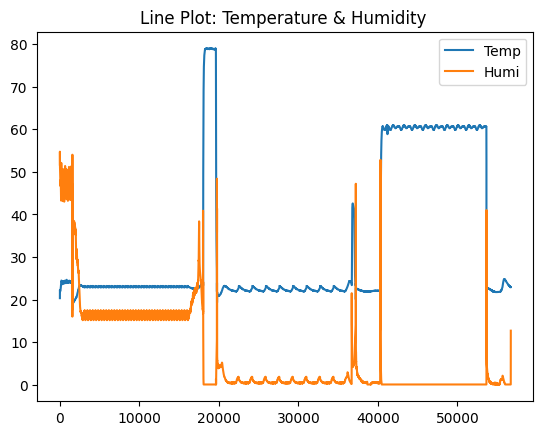

In [100]:
plt.plot(dataset["Temperature"],label = "Temp")
plt.plot(dataset["Humidity"],label = "Humi")

plt.title("Line Plot: Temperature & Humidity ")
plt.legend()

In [53]:
no = [2,3,5,6,8]
all_dataset = pd.DataFrame()

for i in no:
    path = "./smart_sensor_dataset_1/2023-01-16_tag000%d.csv" %i
    dataset = pd.read_csv(path)
    all_dataset = pd.concat([all_dataset,dataset])

range(1, 3)


In [61]:
all_dataset.head()
all_dataset.tail()
#all_dataset.shape

,tagID,measurement time,xAxis,yAxis,vAxis,Temperature,Humidity
56713,8,2023-01-20 16:17:55,-2.0,0.0,10.0,23.000,6.491
56714,8,2023-01-20 16:18:00,-3.0,0.0,8.0,22.987,9.654
56715,8,2023-01-20 16:18:05,-2.0,1.0,8.0,22.964,11.135
56716,8,2023-01-20 16:18:10,-0.0,-0.0,8.0,22.951,11.975
56717,8,2023-01-20 16:18:15,1.0,-0.0,8.0,22.948,12.729


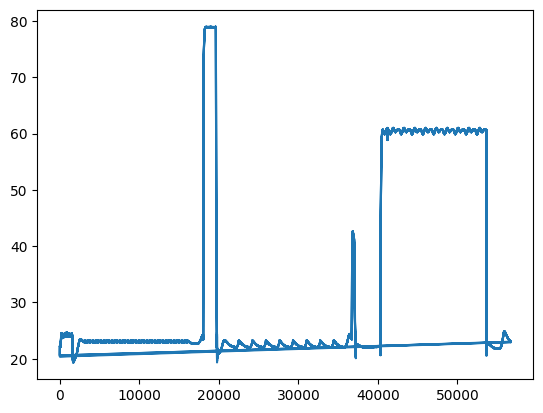

In [80]:
plt.plot(all_dataset.Temperature)

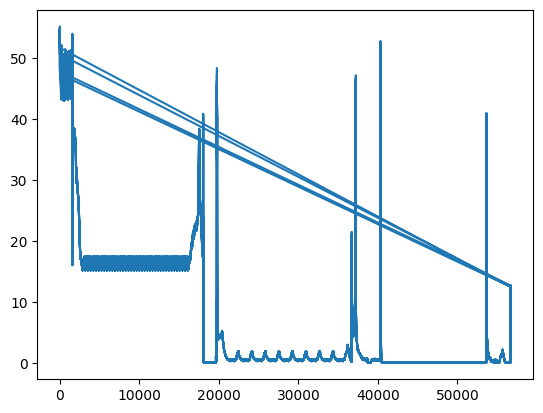

In [82]:
plt.plot(all_dataset.Humidity)

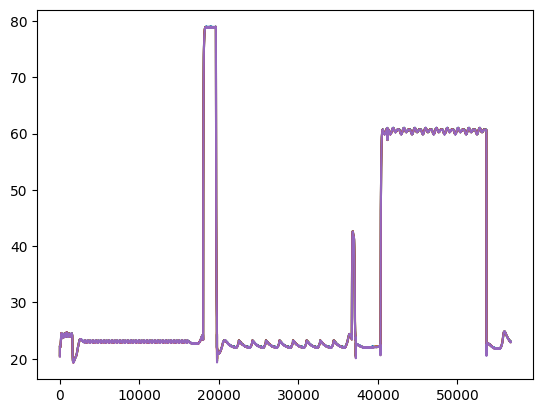

In [81]:

df_id_2 = all_dataset.query('tagID == '"2")
df_id_3 = all_dataset.query('tagID == '"3")
df_id_5 = all_dataset.query('tagID == '"5")
df_id_6 = all_dataset.query('tagID == '"6")
df_id_8 = all_dataset.query('tagID == '"8")

plt.plot(df_id_2.Temperature,label = "tagID")
plt.plot(df_id_3.Temperature,label = "tagID")
plt.plot(df_id_5.Temperature,label = "tagID")
plt.plot(df_id_6.Temperature,label = "tagID")
plt.plot(df_id_8.Temperature,label = "tagID")


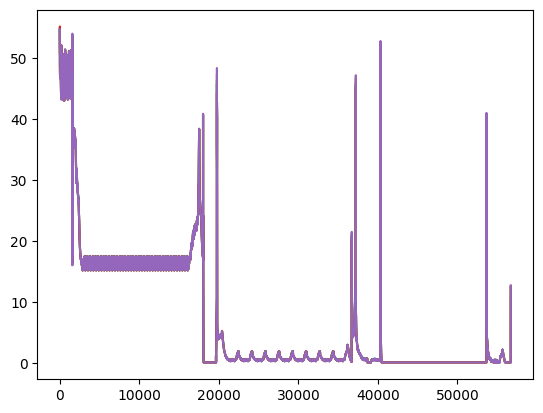

In [96]:
plt.plot(df_id_2.Humidity,label = "tagID")
plt.plot(df_id_3.Humidity,label = "tagID")
plt.plot(df_id_5.Humidity,label = "tagID")
plt.plot(df_id_6.Humidity,label = "tagID")
plt.plot(df_id_8.Humidity,label = "tagID")

In [93]:
print("id 2 summary")
print(df_id_2.describe())
print("id 5 summary")
print(df_id_5.describe())
print("\t")
print("id 8 summary")
print(df_id_8.describe())


id 2 summary
         tagID         xAxis         yAxis         vAxis   Temperature  \
count  56718.0  56718.000000  56718.000000  56718.000000  56718.000000   
mean       2.0      1.050443     -0.868049      2.437604     33.304955   
std        0.0      0.687334      0.997877      2.406027     17.675622   
min        2.0    -11.000000    -34.000000      0.000000     19.396000   
25%        2.0      1.000000     -1.000000      1.000000     22.406000   
50%        2.0      1.000000     -1.000000      2.000000     23.064000   
75%        2.0      1.000000      0.000000      2.000000     59.961000   
max        2.0     14.000000      4.000000     27.000000     79.036000   

           Humidity  
count  56718.000000  
mean       7.024618  
std       10.593326  
min        0.167000  
25%        0.167000  
50%        0.673000  
75%       15.604000  
max       55.036000  
id 5 summary
         tagID         xAxis         yAxis         vAxis   Temperature  \
count  56718.0  56718.000000  56718

In [69]:
fig = plt.figure(figsize = (8,8))
fig.set_facecolor('white')
ax = fig.add_subplot()
ax.plot(

<Figure size 800x800 with 0 Axes>

In [ ]:
plt.plot(df_id_2,)

       tagID     measurement time  xAxis  yAxis  vAxis  Temperature  Humidity
0          2  2023-01-16 09:33:49   10.0   -7.0   14.0       20.584    48.888
1          2  2023-01-16 09:33:53   11.0   -7.0   14.0       20.912    55.036
2          2  2023-01-16 09:33:58    8.0   -4.0    9.0       21.619    54.564
3          2  2023-01-16 09:34:02    2.0    2.0    3.0       22.299    54.379
4          2  2023-01-16 09:34:07    2.0    3.0    3.0       22.327    53.522
...      ...                  ...    ...    ...    ...          ...       ...
56713      2  2023-01-20 16:05:45   -1.0    1.0   10.0       23.060     6.254
56714      2  2023-01-20 16:05:50   -2.0    1.0    8.0       23.053     9.476
56715      2  2023-01-20 16:05:55   -2.0    0.0    8.0       23.032    11.118
56716      2  2023-01-20 16:06:00   -0.0    0.0    8.0       23.019    12.109
56717      2  2023-01-20 16:06:05    0.0   -0.0    8.0       23.015    12.620

[56718 rows x 7 columns]
       tagID     measurement time  xAx

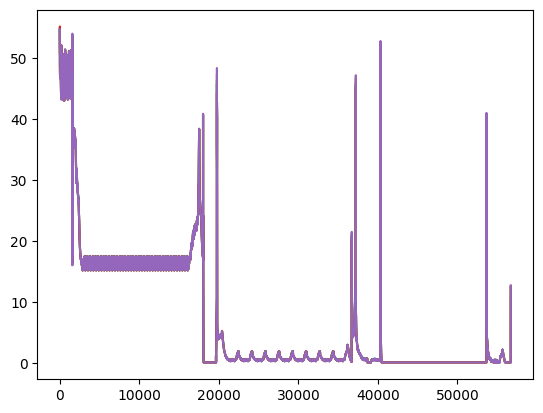

In [75]:
groups = no

linewidths = [1, 2, 3, 4]



for group_name in no:
    # subsetting

    long_df_sub = all_dataset[all_dataset['tagID'] == group_name]
    print(long_df_sub)
    
    # plotting

    plt.plot(long_df_sub.Humidity)

